1.	What are the top 10 YouTube channels based on the number of subscribers?

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='unicode_escape')

In [8]:
print(df.head())

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series  245000000.0  2.280000e+11   
1     2              YouTube Movies  170000000.0  0.000000e+00   
2     3                     MrBeast  166000000.0  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes  162000000.0  1.640000e+11   
4     5                   SET India  159000000.0  1.480000e+11   

           category                       Title  uploads Country of origin  \
0             Music                    T-Series    20082             India   
1  Film & Animation               youtubemovies        1     United States   
2     Entertainment                     MrBeast      741     United States   
3         Education  Cocomelon - Nursery Rhymes      966     United States   
4             Shows                   SET India   116536             India   

         Country Abbreviation  ... subscribers_for_last_30_days  created_year  \
0          india           IN  ...                   

In [9]:
df_sorted = df.sort_values(by='subscribers', ascending=False)
top_10_channels = df_sorted.head(10)[['rank', 'Youtuber', 'subscribers']]
print("Top 10 YouTube channels based on the number of subscribers:")
print(top_10_channels)

Top 10 YouTube channels based on the number of subscribers:
   rank                    Youtuber  subscribers
0     1                    T-Series  245000000.0
1     2              YouTube Movies  170000000.0
2     3                     MrBeast  166000000.0
3     4  Cocomelon - Nursery Rhymes  162000000.0
4     5                   SET India  159000000.0
5     6                       Music  119000000.0
6     7         ýýý Kids Diana Show  112000000.0
7     8                   PewDiePie  111000000.0
8     9                 Like Nastya  106000000.0
9    10               Vlad and Niki   98900000.0


2.	Which category has the highest average number of subscribers?

In [10]:
category_avg_subs = df.groupby('category')['subscribers'].mean()
highest_avg_subs_category = category_avg_subs.idxmax()
highest_avg_subs_value = category_avg_subs.max()
print(f"The category with the highest average number of subscribers is: {highest_avg_subs_category}")
print(f"Average number of subscribers in this category: {highest_avg_subs_value}")

The category with the highest average number of subscribers is: Shows
Average number of subscribers in this category: 41615384.615384616


3.	How many videos, on average, are uploaded by YouTube channels in each category?

In [11]:
avg_uploads_per_category = df.groupby('category')['uploads'].mean().reset_index()
avg_uploads_per_category.columns = ['category', 'average_uploads']
print("Average number of videos uploaded by YouTube channels in each category:")
print(avg_uploads_per_category)

Average number of videos uploaded by YouTube channels in each category:
                 category  average_uploads
0        Autos & Vehicles      1550.666667
1                  Comedy      1202.557143
2               Education      3087.086957
3           Entertainment     12052.445378
4        Film & Animation      2861.844444
5                  Gaming      4285.273684
6           Howto & Style      1695.500000
7                  Movies      3553.000000
8                   Music      2325.945813
9         News & Politics    112484.384615
10  Nonprofits & Activism    102912.000000
11         People & Blogs      9256.793893
12         Pets & Animals      3562.800000
13   Science & Technology      2114.058824
14                  Shows     27443.692308
15                 Sports     19129.833333
16               Trailers      6839.000000
17        Travel & Events       766.000000


4.	What are the top 5 countries with the highest number of YouTube channels?

In [12]:
country_counts = df['Country'].value_counts()
top_5_countries = country_counts.head(5).reset_index()
top_5_countries.columns = ['Country', 'Number of YouTube Channels']
print("Top 5 countries with the highest number of YouTube channels:")
print(top_5_countries)

Top 5 countries with the highest number of YouTube channels:
          Country  Number of YouTube Channels
0   United States                         315
1           India                         169
2          Brazil                          62
3  United Kingdom                          44
4          Mexico                          33


5.	What is the distribution of channel types across different categories?

In [13]:
channel_type_distribution = pd.crosstab(df['category'], df['channel_type'], normalize='index') * 100
print("Distribution of channel types across different categories (percentage):")
print(channel_type_distribution)

Distribution of channel types across different categories (percentage):
channel_type             Animals      Autos     Comedy  Education  \
category                                                            
Autos & Vehicles        0.000000  66.666667   0.000000   0.000000   
Comedy                  0.000000   0.000000  57.352941   0.000000   
Education               0.000000   0.000000   0.000000  78.260870   
Entertainment           0.000000   0.434783   2.173913   0.869565   
Film & Animation        0.000000   0.000000   2.272727   4.545455   
Gaming                  0.000000   1.075269   1.075269   0.000000   
Howto & Style           0.000000   0.000000   0.000000   0.000000   
Movies                  0.000000   0.000000   0.000000   0.000000   
Music                   0.000000   0.000000   0.000000   0.502513   
News & Politics         0.000000   0.000000   0.000000   0.000000   
Nonprofits & Activism   0.000000   0.000000   0.000000   0.000000   
People & Blogs          0.78740

6.	Is there a correlation between the number of subscribers and total video views for YouTube channels?

In [15]:
df['subscribers'] = pd.to_numeric(df['subscribers'], errors='coerce')
df['video views'] = pd.to_numeric(df['video views'], errors='coerce')
df.dropna(subset=['subscribers', 'video views'], inplace=True)
numerical_columns = ['subscribers', 'video views']
correlation_matrix = df[numerical_columns].corr()
print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
             subscribers  video views
subscribers     1.000000     0.748179
video views     0.748179     1.000000


7.	How do the monthly earnings vary throughout different categories?

In [16]:
df['lowest_monthly_earnings'] = pd.to_numeric(df['lowest_monthly_earnings'], errors='coerce')
df['highest_monthly_earnings'] = pd.to_numeric(df['highest_monthly_earnings'], errors='coerce')
df.dropna(subset=['lowest_monthly_earnings', 'highest_monthly_earnings'], inplace=True)
monthly_earnings_stats = df.groupby('category').agg({
    'lowest_monthly_earnings': ['mean', 'median', 'std'],
    'highest_monthly_earnings': ['mean', 'median', 'std']
})
print("Summary statistics for monthly earnings across different categories:")
print(monthly_earnings_stats)


Summary statistics for monthly earnings across different categories:
                      lowest_monthly_earnings                          \
                                         mean   median            std   
category                                                                
Autos & Vehicles                 74966.666667  88300.0   23094.010768   
Comedy                           41332.285714   8150.0   68125.355938   
Education                        46863.239348  22800.0   82734.102384   
Entertainment                    39549.816034  11500.0   73882.890614   
Film & Animation                 47325.318409  14550.0  101174.440673   
Gaming                           16926.064681   9800.0   31829.794731   
Howto & Style                    12022.350500   5700.0   21480.169085   
Movies                           28400.000000  28400.0   40163.665171   
Music                            34671.696798  22200.0   56521.742236   
News & Politics                  40192.625000  30850.0 

8.	What is the overall trend in subscribers gained in the last 30 days across all channels?

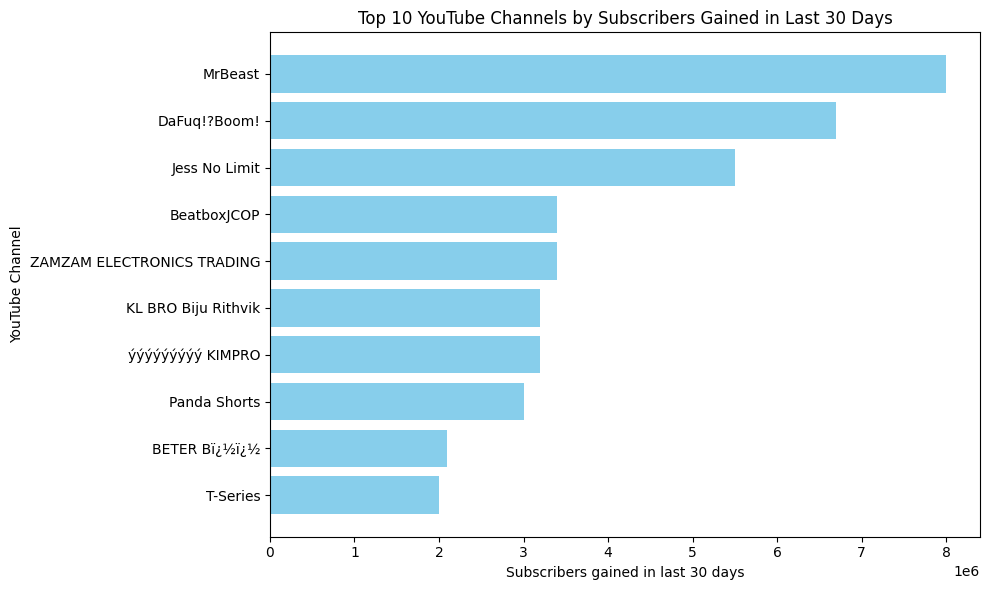

In [18]:
df['subscribers_for_last_30_days'] = pd.to_numeric(df['subscribers_for_last_30_days'], errors='coerce')
df.dropna(subset=['subscribers_for_last_30_days'], inplace=True)
df_sorted = df.sort_values(by='subscribers_for_last_30_days', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Youtuber'][:10], df_sorted['subscribers_for_last_30_days'][:10], color='skyblue')
plt.xlabel('Subscribers gained in last 30 days')
plt.ylabel('YouTube Channel')
plt.title('Top 10 YouTube Channels by Subscribers Gained in Last 30 Days')
plt.gca().invert_yaxis()  # Invert y-axis to display the channel with the highest subscribers at the top
plt.tight_layout()
plt.show()

9.	Are there any outliers in terms of yearly earnings from YouTube channels?

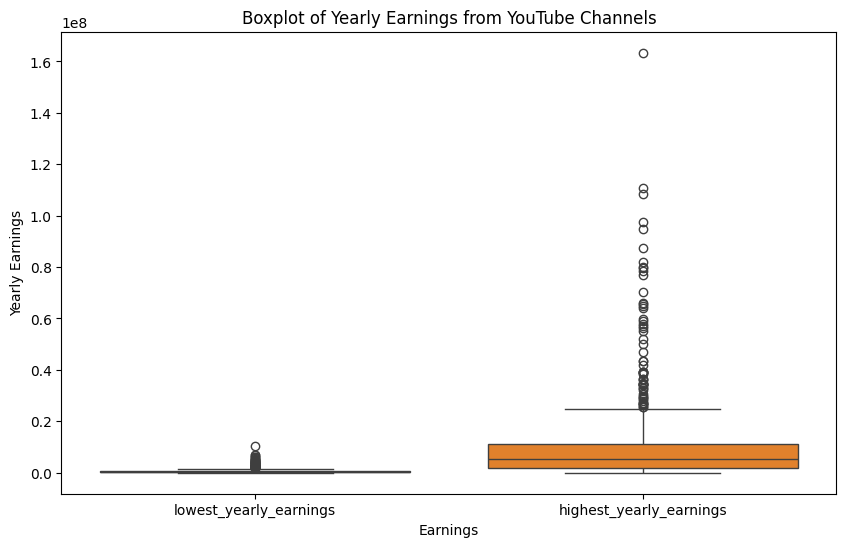

In [19]:
df['lowest_yearly_earnings'] = pd.to_numeric(df['lowest_yearly_earnings'], errors='coerce')
df['highest_yearly_earnings'] = pd.to_numeric(df['highest_yearly_earnings'], errors='coerce')
df.dropna(subset=['lowest_yearly_earnings', 'highest_yearly_earnings'], inplace=True)
yearly_earnings = pd.concat([df['lowest_yearly_earnings'], df['highest_yearly_earnings']], axis=1)
plt.figure(figsize=(10, 6))
sns.boxplot(data=yearly_earnings)
plt.title('Boxplot of Yearly Earnings from YouTube Channels')
plt.xlabel('Earnings')
plt.ylabel('Yearly Earnings')
plt.show()

10.	What is the distribution of channel creation dates? Is there any trend over time?

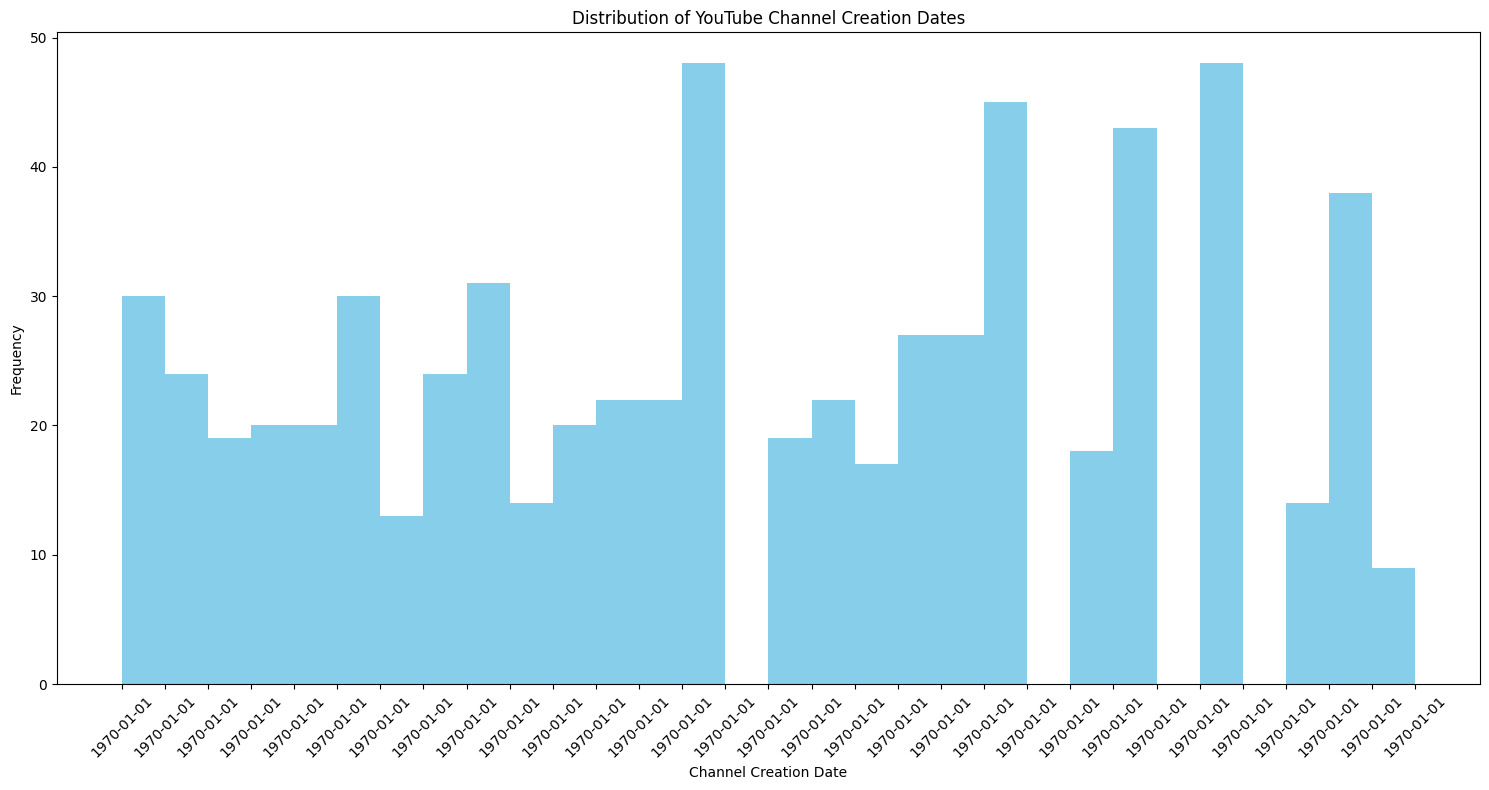

In [24]:
df['created_date'] = pd.to_datetime(df['created_date'])
plt.figure(figsize=(15, 8))
plt.hist(df['created_date'], bins=30, color='skyblue')
plt.xlabel('Channel Creation Date')
plt.ylabel('Frequency')
plt.title('Distribution of YouTube Channel Creation Dates')
plt.xticks(df['created_date'].unique(), rotation=45)  # Set x-axis ticks to all unique dates
plt.tight_layout()
plt.show()

11.	Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?

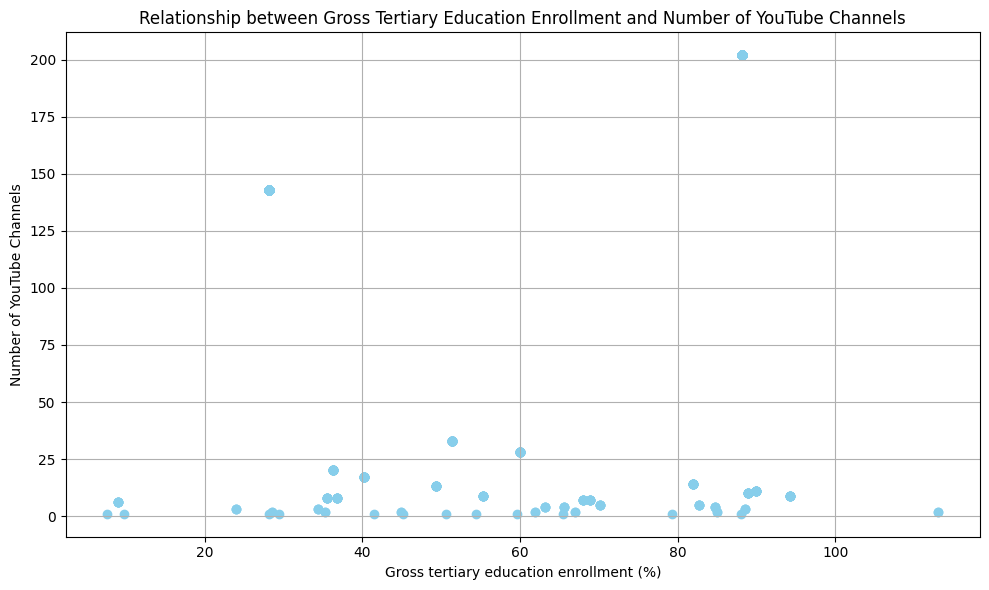

In [26]:
df['Gross tertiary education enrollment (%)'] = pd.to_numeric(df['Gross tertiary education enrollment (%)'], errors='coerce')
df.dropna(subset=['Gross tertiary education enrollment (%)'], inplace=True)

country_channel_counts = df['Country'].value_counts().reset_index()
country_channel_counts.columns = ['Country', 'Number of YouTube Channels']
merged_data = pd.merge(country_channel_counts, df[['Country', 'Gross tertiary education enrollment (%)']], on='Country', how='left')

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Gross tertiary education enrollment (%)'], merged_data['Number of YouTube Channels'], color='skyblue')
plt.xlabel('Gross tertiary education enrollment (%)')
plt.ylabel('Number of YouTube Channels')
plt.title('Relationship between Gross Tertiary Education Enrollment and Number of YouTube Channels')
plt.grid(True)
plt.tight_layout()
plt.show()

12.	How does the unemployment rate vary among the top 10 countries with the highest number of YouTube channels?

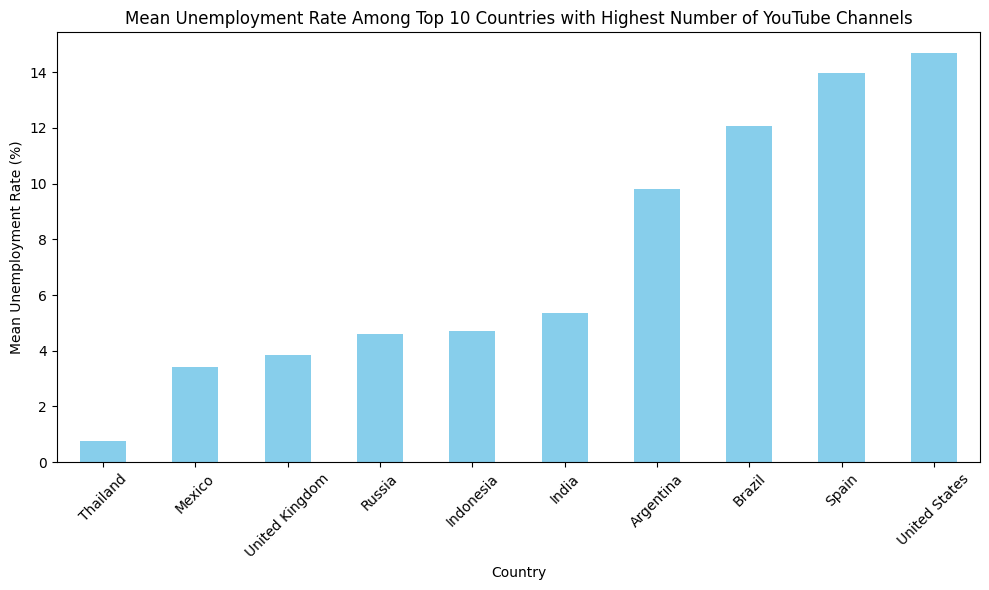

In [27]:
top_10_countries = df['Country'].value_counts().head(10).index.tolist()
df_top_10_countries = df[df['Country'].isin(top_10_countries)]
mean_unemployment_rate = df_top_10_countries.groupby('Country')['Unemployment rate'].mean().sort_values()
plt.figure(figsize=(10, 6))
mean_unemployment_rate.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Mean Unemployment Rate (%)')
plt.title('Mean Unemployment Rate Among Top 10 Countries with Highest Number of YouTube Channels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

13.	What is the average urban population percentage in countries with YouTube channels?

In [28]:
df['Urban_population'] = pd.to_numeric(df['Urban_population'], errors='coerce')
df.dropna(subset=['Urban_population'], inplace=True)
average_urban_population = df['Urban_population'].mean()
print("Average Urban Population Percentage in Countries with YouTube Channels:", average_urban_population)

Average Urban Population Percentage in Countries with YouTube Channels: 236774361.95348838


14.	Are there any patterns in the distribution of YouTube channels based on latitude and longitude coordinates?

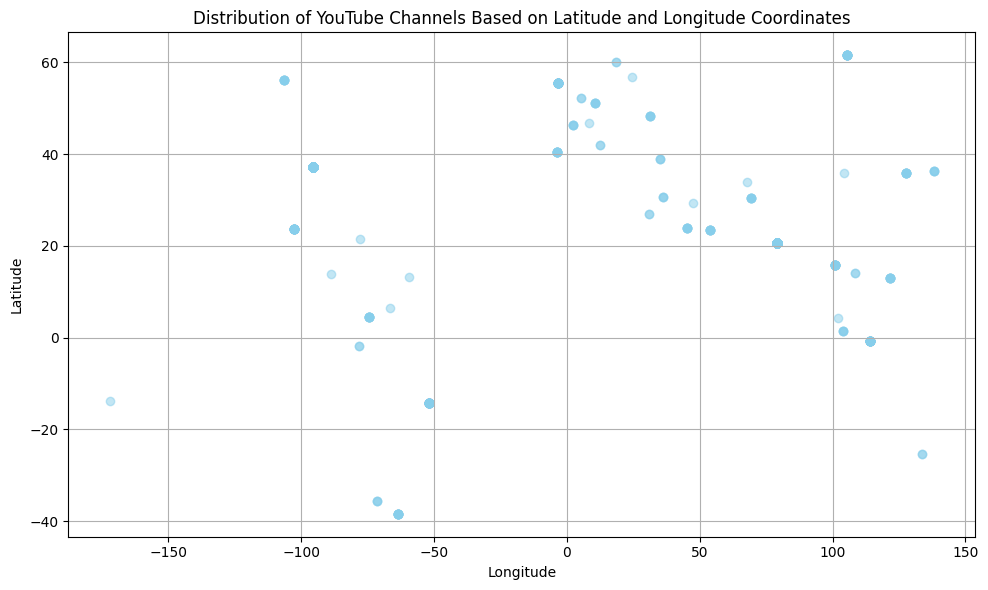

In [29]:
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], color='skyblue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of YouTube Channels Based on Latitude and Longitude Coordinates')
plt.grid(True)  # Add gridlines for better visualization
plt.tight_layout()
plt.show()

15.	What is the correlation between the number of subscribers and the population of a country?

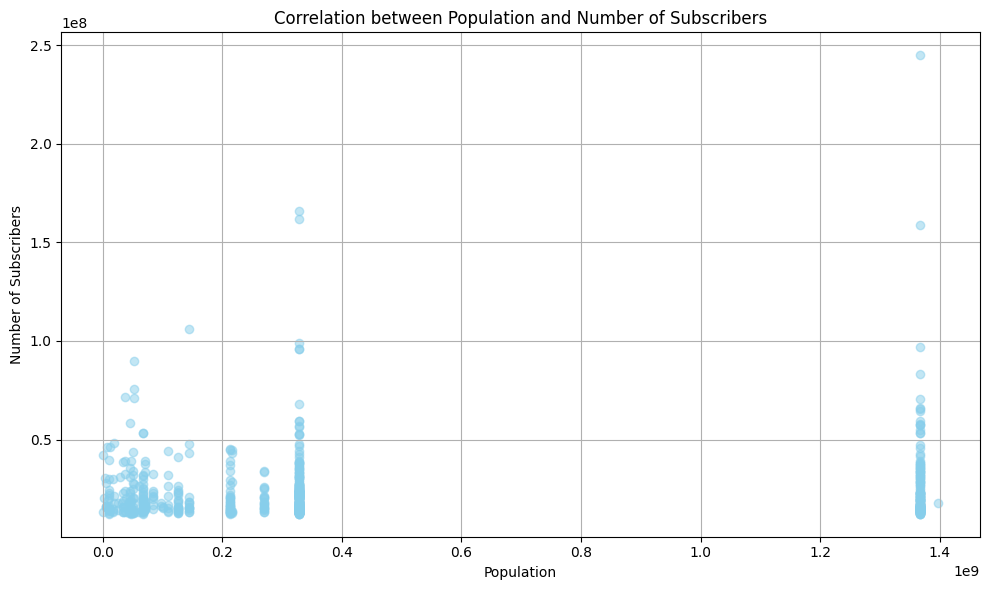

In [30]:
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')
df['subscribers'] = pd.to_numeric(df['subscribers'], errors='coerce')
df.dropna(subset=['Population', 'subscribers'], inplace=True)
plt.figure(figsize=(10, 6))
plt.scatter(df['Population'], df['subscribers'], color='skyblue', alpha=0.5)
plt.xlabel('Population')
plt.ylabel('Number of Subscribers')
plt.title('Correlation between Population and Number of Subscribers')
plt.grid(True)  # Add gridlines for better visualization
plt.tight_layout()
plt.show()

16.	How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population?

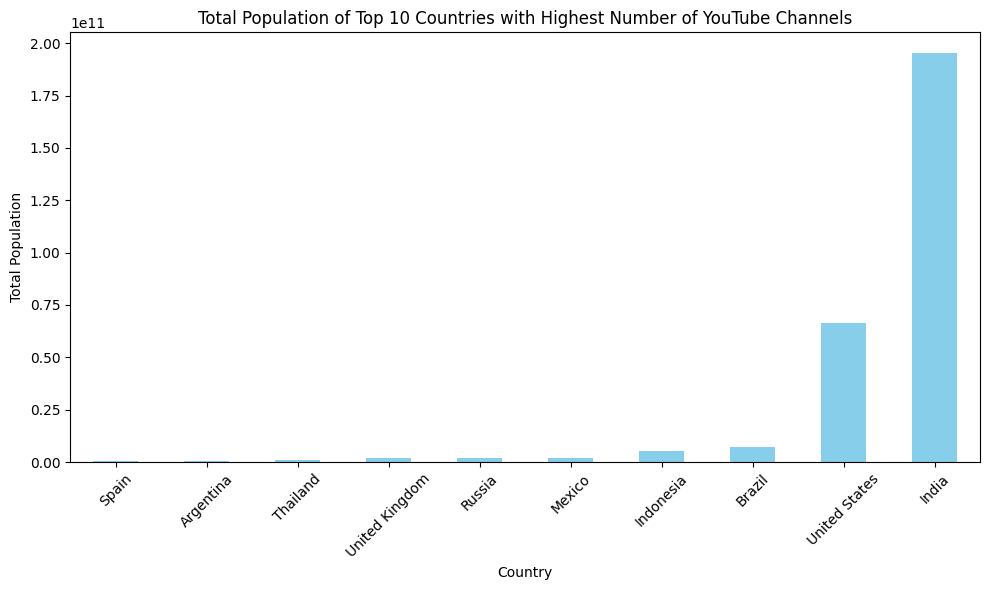

In [31]:
top_10_countries = df['Country'].value_counts().head(10).index.tolist()
df_top_10_countries = df[df['Country'].isin(top_10_countries)]
total_population = df_top_10_countries.groupby('Country')['Population'].sum().sort_values()
plt.figure(figsize=(10, 6))
total_population.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Population')
plt.title('Total Population of Top 10 Countries with Highest Number of YouTube Channels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

17.	Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?

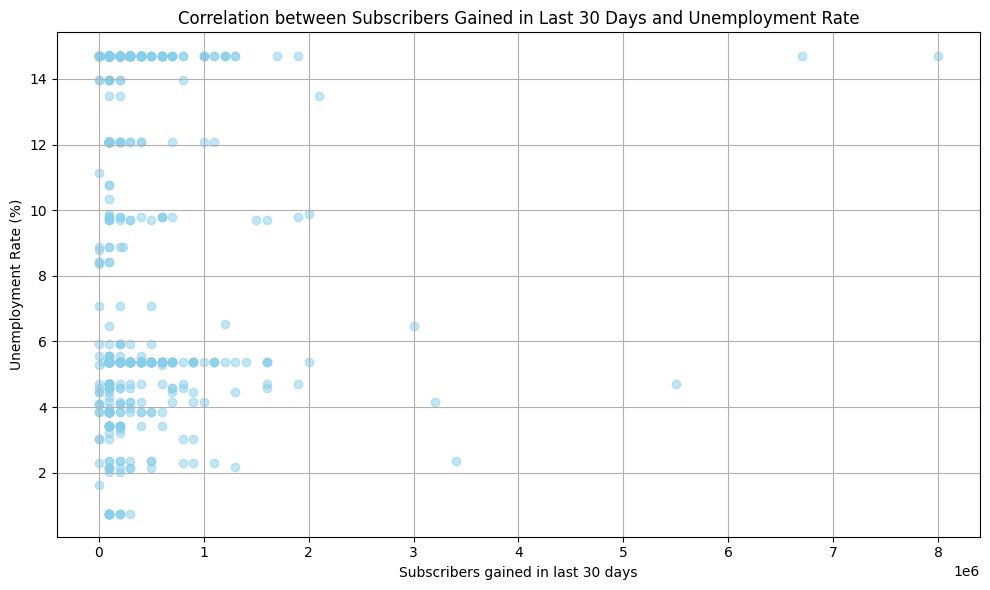

In [32]:
df['subscribers_for_last_30_days'] = pd.to_numeric(df['subscribers_for_last_30_days'], errors='coerce')
df['Unemployment rate'] = pd.to_numeric(df['Unemployment rate'], errors='coerce')
df.dropna(subset=['subscribers_for_last_30_days', 'Unemployment rate'], inplace=True)
plt.figure(figsize=(10, 6))
plt.scatter(df['subscribers_for_last_30_days'], df['Unemployment rate'], color='skyblue', alpha=0.5)
plt.xlabel('Subscribers gained in last 30 days')
plt.ylabel('Unemployment Rate (%)')
plt.title('Correlation between Subscribers Gained in Last 30 Days and Unemployment Rate')
plt.grid(True)  # Add gridlines for better visualization
plt.tight_layout()
plt.show()

18.	How does the distribution of video views for the last 30 days vary across different channel types?

<Figure size 1000x600 with 0 Axes>

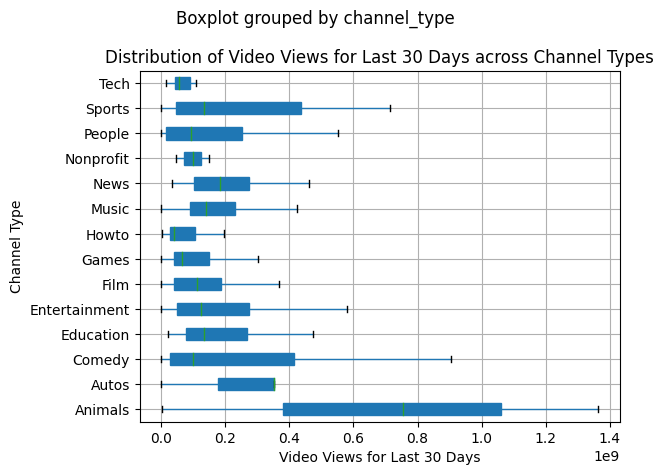

In [33]:
plt.figure(figsize=(10, 6))
df.boxplot(column='video_views_for_the_last_30_days', by='channel_type', vert=False, patch_artist=True, showfliers=False)
plt.xlabel('Video Views for Last 30 Days')
plt.ylabel('Channel Type')
plt.title('Distribution of Video Views for Last 30 Days across Channel Types')
plt.tight_layout()
plt.show()

20.	What is the average number of subscribers gained per month since the creation of YouTube channels till now?

In [37]:
df['created_date'] = pd.to_datetime(df['created_date'])
df['months_since_creation'] = (pd.to_datetime('now') - df['created_date']) // pd.Timedelta('30D')
df['avg_subscribers_per_month'] = df['subscribers'] / df['months_since_creation']
overall_avg_subscribers_per_month = df['avg_subscribers_per_month'].mean()
print("Overall Average Subscribers Gained Per Month Since Channel Creation:", overall_avg_subscribers_per_month)


Overall Average Subscribers Gained Per Month Since Channel Creation: 36851.48196846363
